In [18]:
import os

def get_valid_filenames(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return {os.path.splitext(line.strip())[0] for line in f}

def clean_directory(directory, valid_filenames):
    n, k = 0, 0
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            name_without_ext = os.path.splitext(filename)[0]
            if name_without_ext not in valid_filenames:
                os.remove(file_path)
                n += 1
            else:
                k += 1
    print(n, k)


directory = "./supervised/Agriculture-Vision-2021/train/labels/double_plant"
info_file = "./datasetinfo/train_images.txt"
valid_filenames = get_valid_filenames(info_file)
clean_directory(directory, valid_filenames)
directory = "./supervised/Agriculture-Vision-2021/train/labels/drydown"
clean_directory(directory, valid_filenames)
directory = "./supervised/Agriculture-Vision-2021/train/labels/endrow"
clean_directory(directory, valid_filenames)
directory = "./supervised/Agriculture-Vision-2021/train/labels/nutrient_deficiency"
clean_directory(directory, valid_filenames)
directory = "./supervised/Agriculture-Vision-2021/train/labels/planter_skip"
clean_directory(directory, valid_filenames)
directory = "./supervised/Agriculture-Vision-2021/train/labels/storm_damage"
clean_directory(directory, valid_filenames)
directory = "./supervised/Agriculture-Vision-2021/train/labels/water"
clean_directory(directory, valid_filenames)
directory = "./supervised/Agriculture-Vision-2021/train/labels/waterway"
clean_directory(directory, valid_filenames)
directory = "./supervised/Agriculture-Vision-2021/train/labels/weed_cluster"
clean_directory(directory, valid_filenames)

36944 20000
36944 20000
36944 20000
36944 20000
36944 20000
36944 20000
36944 20000
36944 20000
36944 20000


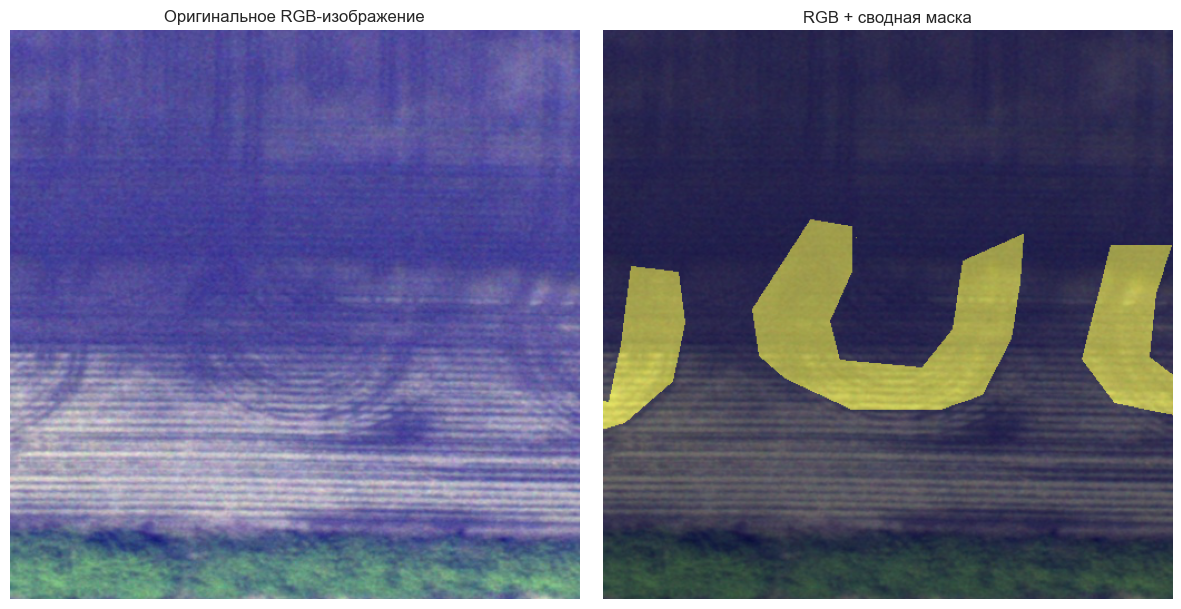

In [3]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

TRAIN_DIR = "./supervised/Agriculture-Vision-2021/train"

RGB_DIR = os.path.join(TRAIN_DIR, "images", "rgb")

LABELS_SUBFOLDERS = [
    "double_plant",
    "drydown",
    "endrow",
    "nutrient_deficiency",
    "planter_skip",
    "storm_damage",
    "water",
    "waterway",
    "weed_cluster"
]

LABEL_COLORS = {
    "double_plant":        (255,   0,   0),  # красный
    "drydown":             (255, 165,   0),  # оранжевый
    "endrow":              (255, 255,   0),  # жёлтый
    "nutrient_deficiency": (  0, 255,   0),  # зелёный
    "planter_skip":        (  0, 255, 255),  # голубой
    "storm_damage":        (  0,   0, 255),  # синий
    "water":               (138,  43, 226),  # фиолетовый
    "waterway":            (255, 192, 203),  # розовый
    "weed_cluster":        (128, 128, 128),  # серый
}

def visualize_sample(base_name):
    rgb_path = os.path.join(RGB_DIR, f"{base_name}.jpg")
    if not os.path.exists(rgb_path):
        print(f"RGB-файл не найден: {rgb_path}")
        return

    rgb_image = Image.open(rgb_path).convert("RGB")
    rgb_array = np.array(rgb_image)

    mask_combined = np.zeros_like(rgb_array, dtype=np.uint8)  # (H, W, 3)

    for label_name in LABELS_SUBFOLDERS:
        label_dir = os.path.join(TRAIN_DIR, "labels", label_name)
        label_path = os.path.join(label_dir, f"{base_name}.png")

        if os.path.exists(label_path):
            label_mask = Image.open(label_path).convert("L")
            label_mask_np = np.array(label_mask)  # (H, W)

            class_mask_bool = label_mask_np > 0

            color = LABEL_COLORS[label_name]
            mask_combined[class_mask_bool] = color

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(rgb_array)
    plt.title("Оригинальное RGB-изображение")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(rgb_array)
    plt.imshow(mask_combined, alpha=0.5)
    plt.title("RGB + сводная маска")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


def visualize_n_samples(n):
    jpg_files = glob.glob(os.path.join(RGB_DIR, "*.jpg"))

    i = 0
    for jpg_file in jpg_files:
        base_name = os.path.splitext(os.path.basename(jpg_file))[0]

        print(f"Визуализация: {base_name}")
        visualize_sample(base_name)
        i += 1
        if i == n:
            return

visualize_sample("FRXJLQFX7_4950-7838-5462-8350")

Train images: 56944, Train label files: 56944
Class distribution (train): {0: 9608, 1: 23927, 2: 6674, 3: 18555, 4: 4285, 5: 934, 6: 2732, 7: 4284, 8: 30880}
Val images: 18334, Val label files: 18334
Class distribution (val): {0: 3787, 1: 7962, 2: 2740, 3: 5169, 4: 2361, 5: 122, 6: 1249, 7: 757, 8: 7405}


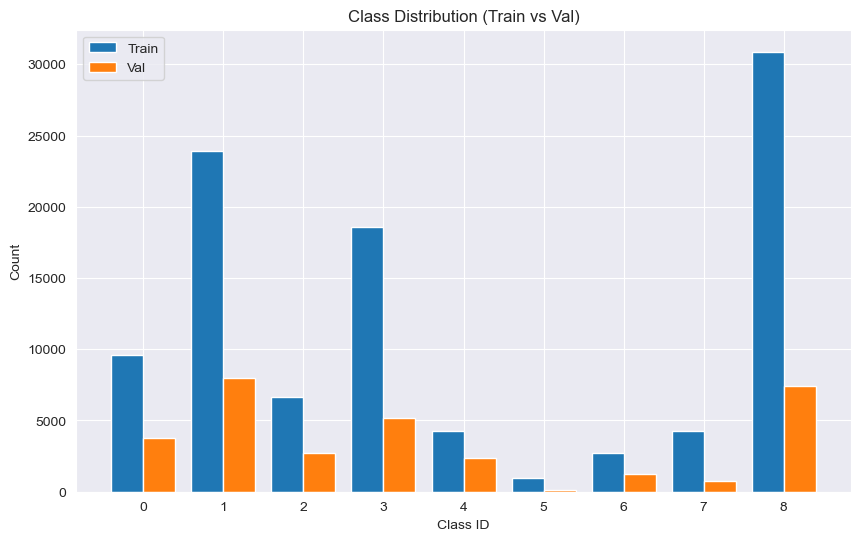

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def count_images_and_labels(labels_dir, images_dir, num_classes=None):
    txt_files = glob.glob(os.path.join(labels_dir, "*.txt"))
    image_files = []
    for ext in ("*.jpg", "*.jpeg", "*.png", "*.bmp"):
        image_files.extend(glob.glob(os.path.join(images_dir, ext)))
    
    class_counts = {}
    if num_classes is not None:
        for cid in range(num_classes):
            class_counts[cid] = 0

    for txt_file in txt_files:
        with open(txt_file, "r", encoding="utf-8") as f:
            lines = f.read().strip().splitlines()
        for line in lines:
            if not line.strip():
                continue
            parts = line.split()
            class_id = int(parts[0])
            if class_id not in class_counts:
                class_counts[class_id] = 0
            class_counts[class_id] += 1
    
    return len(txt_files), len(image_files), class_counts


def plot_class_distribution(class_counts_train, class_counts_val, title="Class Distribution"):
    all_classes = sorted(set(class_counts_train.keys()) | set(class_counts_val.keys()))
    
    train_values = [class_counts_train.get(cid, 0) for cid in all_classes]
    val_values   = [class_counts_val.get(cid, 0)   for cid in all_classes]
    
    x = range(len(all_classes))
    width = 0.4
    
    plt.figure(figsize=(10, 6))
    plt.bar([xi - width/2 for xi in x], train_values, width=width, label="Train")
    plt.bar([xi + width/2 for xi in x], val_values,   width=width, label="Val")
    
    plt.xticks(x, [str(cid) for cid in all_classes])
    plt.xlabel("Class ID")
    plt.ylabel("Count")
    plt.title(title)
    plt.legend()
    plt.show()



data_root = "./datasets/AgricultureVisionYOLOrgb"
train_labels_dir = os.path.join(data_root, "train", "labels")
train_images_dir = os.path.join(data_root, "train", "images")

val_labels_dir   = os.path.join(data_root, "val", "labels")
val_images_dir   = os.path.join(data_root, "val", "images")

num_classes = 9

train_txt_count, train_img_count, train_class_counts = count_images_and_labels(
    labels_dir=train_labels_dir,
    images_dir=train_images_dir,
    num_classes=num_classes
)

val_txt_count, val_img_count, val_class_counts = count_images_and_labels(
    labels_dir=val_labels_dir,
    images_dir=val_images_dir,
    num_classes=num_classes
)

print(f"Train images: {train_img_count}, Train label files: {train_txt_count}")
print("Class distribution (train):", train_class_counts)

print(f"Val images: {val_img_count}, Val label files: {val_txt_count}")
print("Class distribution (val):", val_class_counts)

plot_class_distribution(train_class_counts, val_class_counts, title="Class Distribution (Train vs Val)")

<>:107: SyntaxWarning: invalid escape sequence '\s'
<>:107: SyntaxWarning: invalid escape sequence '\s'
/var/folders/01/9fgfj_155d7bjqsw7tkb47m80000gn/T/ipykernel_43064/2933031744.py:107: SyntaxWarning: invalid escape sequence '\s'
  """


Building metadata for Train ...
Found 56944 label files in ./datasets/AgricultureVisionYOLOrgb/train/labels


Remove Train: 100%|██████████| 36944/36944 [07:16<00:00, 84.68it/s] 


Removed 36944 files from Train (requested 36944)
Train images: 20000, Train label files: 20000
Class distribution (train): {0: 4691, 1: 4521, 2: 4384, 3: 4576, 4: 4285, 5: 934, 6: 2732, 7: 3337, 8: 8880}
Val images: 5000, Val label files: 5000
Class distribution (val): {0: 1045, 1: 1549, 2: 940, 3: 1026, 4: 1343, 5: 122, 6: 860, 7: 702, 8: 1248}


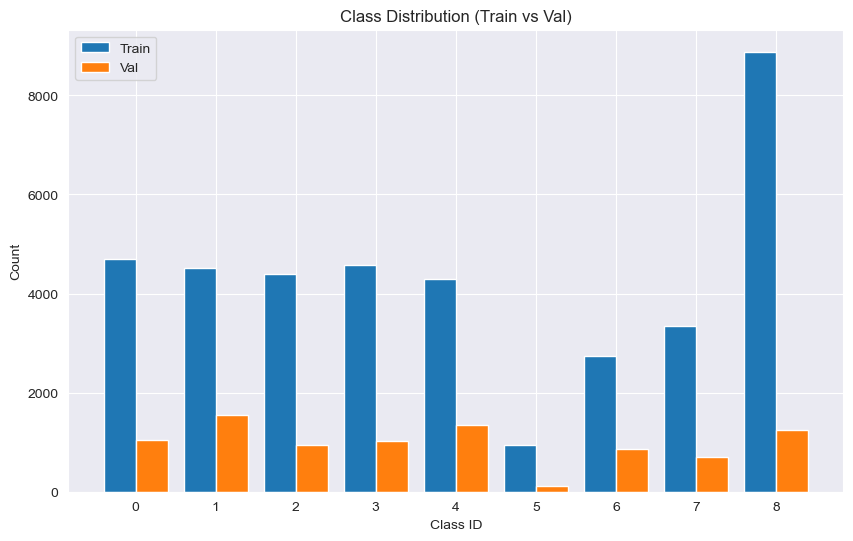

In [4]:
import os
import glob
import shutil
from tqdm import tqdm

def load_label_files(labels_dir, exts=(".txt",)):
    files = []
    for e in exts:
        files.extend(glob.glob(os.path.join(labels_dir, f"*{e}")))
    files.sort()
    return files

def parse_classes_in_file(txt_file):
    classes = set()
    with open(txt_file, "r", encoding="utf-8") as f:
        lines = f.read().strip().splitlines()
    for line in lines:
        if not line.strip():
            continue
        parts = line.split()
        class_id = int(parts[0])
        classes.add(class_id)
    return classes

def build_metadata(labels_dir, images_dir):
    meta = []
    label_files = load_label_files(labels_dir, exts=(".txt",))
    for lf in label_files:
        base_name = os.path.splitext(os.path.basename(lf))[0]
        image_path = None
        for ext_img in (".jpg", ".jpeg", ".png", ".bmp"):
            candidate = os.path.join(images_dir, base_name + ext_img)
            if os.path.exists(candidate):
                image_path = candidate
                break
        classes = parse_classes_in_file(lf)
        meta.append({
            "label_path": lf,
            "image_path": image_path,
            "classes": classes,
            "removed": False
        })
    return meta

def get_class_counts(meta):
    counts = {}
    for item in meta:
        if item["removed"]:
            continue
        for c in item["classes"]:
            counts[c] = counts.get(c, 0) + 1
    return counts

def find_top_n_classes(class_counts, n=3):
    sorted_items = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    top_classes = [cid for cid, cnt in sorted_items[:n]]
    return top_classes

def remove_label_and_image(item):
    lp = item["label_path"]
    ip = item["image_path"]

    if lp and os.path.exists(lp):
        os.remove(lp)
    if ip and os.path.exists(ip):
        os.remove(ip)

    item["removed"] = True


def dynamic_remove_top3(
    meta,
    num_to_remove,
    desc="Removing files with only top-3 classes"
):
    removed_count = 0
    pbar = tqdm(total=num_to_remove, desc=desc)
    
    while removed_count < num_to_remove:
        cc = get_class_counts(meta)
        if not cc:
            break
        top3 = find_top_n_classes(cc, n=3)
        top3_set = set(top3)

        found_index = -1
        for i, item in enumerate(meta):
            if item["removed"]:
                continue
            if item["classes"].issubset(top3_set) and len(item["classes"])>0:
                found_index = i
                break
        
        if found_index == -1:
            break

        remove_label_and_image(meta[found_index])
        removed_count += 1
        pbar.update(1)
    
    pbar.close()
    return removed_count


def run_process(
    labels_dir,
    images_dir,
    num_to_remove,
    desc
):
    print(f"Building metadata for {desc} ...")
    meta = build_metadata(labels_dir, images_dir)
    print(f"Found {len(meta)} label files in {labels_dir}")

    removed = dynamic_remove_top3(meta, num_to_remove, desc=f"Remove {desc}")
    print(f"Removed {removed} files from {desc} (requested {num_to_remove})")


train_remove = 36944

run_process(
    labels_dir=train_labels_dir,
    images_dir=train_images_dir,
    num_to_remove=train_remove,
    desc="Train"
)

train_txt_count, train_img_count, train_class_counts = count_images_and_labels(
    labels_dir=train_labels_dir,
    images_dir=train_images_dir,
    num_classes=num_classes
)

val_txt_count, val_img_count, val_class_counts = count_images_and_labels(
    labels_dir=val_labels_dir,
    images_dir=val_images_dir,
    num_classes=num_classes
)

print(f"Train images: {train_img_count}, Train label files: {train_txt_count}")
print("Class distribution (train):", train_class_counts)

print(f"Val images: {val_img_count}, Val label files: {val_txt_count}")
print("Class distribution (val):", val_class_counts)

plot_class_distribution(train_class_counts, val_class_counts, title="Class Distribution (Train vs Val)")

In [3]:
LABELS_TO_INDEX = {
    "double_plant": 0,
    "drydown": 1,
    "endrow": 2,
    "nutrient_deficiency": 3,
    "planter_skip": 4,
    "storm_damage": 5,
    "water": 6,
    "waterway": 7,
    "weed_cluster": 8
}


In [15]:
import cv2

def generate_yolo_seg_labels(
    image_path,
    labels_root,
    labels_to_index,
    output_dir=None
):
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    
    with Image.open(image_path) as img:
        width, height = img.size  # (W,H)
    
    yolo_lines = []

    for class_name, class_idx in labels_to_index.items():
        label_path = os.path.join(labels_root, class_name, f"{base_name}.png")
        
        if not os.path.exists(label_path):
            continue
        
        mask = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            continue
        
        _, mask_bin = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

        contours, _ = cv2.findContours(mask_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for cnt in contours:
            polygon = cnt.reshape(-1, 2)  # (N, 2)

            norm_points = []
            for x, y in polygon:
                x_norm = x / width
                y_norm = y / height
                norm_points.append(x_norm)
                norm_points.append(y_norm)

            line_str = f"{class_idx} " + " ".join(map(str, norm_points))
            yolo_lines.append(line_str)
    
    if output_dir is None:
        txt_path = os.path.join(
            os.path.dirname(image_path),
            f"{base_name}.txt"
        )
    else:
        os.makedirs(output_dir, exist_ok=True)
        txt_path = os.path.join(output_dir, f"{base_name}.txt")
    
    if len(yolo_lines) == 0:
        with open(txt_path, 'w') as f:
            pass
    else:
        with open(txt_path, 'w') as f:
            f.write("\n".join(yolo_lines))

In [21]:
from tqdm import tqdm

def convert_all_images_to_yolo(
    images_dir,
    labels_root,
    labels_to_index,
    output_dir=None
):
    all_jpg = glob.glob(os.path.join(images_dir, "*.jpg"))
    
    print(f"Found {len(all_jpg)} images in {images_dir}")
    
    for jpg_path in tqdm(all_jpg, desc="Converting images", unit="image"):
        generate_yolo_seg_labels(
            image_path=jpg_path,
            labels_root=labels_root,
            labels_to_index=labels_to_index,
            output_dir=output_dir
        )



In [22]:
VAL_DIR = "./supervised/Agriculture-Vision-2021/val"
RGB_DIR = os.path.join(VAL_DIR, "images", "rgb")
LABELS_ROOT = os.path.join(VAL_DIR, "labels")

convert_all_images_to_yolo(
    images_dir=RGB_DIR,
    labels_root=LABELS_ROOT,
    labels_to_index=LABELS_TO_INDEX,
    output_dir="./supervised/Agriculture-Vision-2021/val/labelsYOLO"  # или укажите другую папку для txt
)

Found 18334 images in ./supervised/Agriculture-Vision-2021/val/images/rgb


Converting images: 100%|██████████| 18334/18334 [08:40<00:00, 35.21image/s]


In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

CLASS_COLORS = {
    0: (255,   0,   0),   # double_plant - красный
    1: (255, 165,   0),   # drydown - оранжевый
    2: (255, 255,   0),   # endrow - жёлтый
    3: (  0, 255,   0),   # nutrient_deficiency - зелёный
    4: (  0, 255, 255),   # planter_skip - голубой
    5: (  0,   0, 255),   # storm_damage - синий
    6: (138,  43, 226),   # water - фиолетовый
    7: (255, 192, 203),   # waterway - розовый
    8: (128, 128, 128),   # weed_cluster - серый
}

def visualize_yolo_seg(image_path, txt_path):
    if not os.path.exists(image_path):
        print(f"[ERROR] Изображение не найдено: {image_path}")
        return
    
    if not os.path.exists(txt_path):
        print(f"[WARNING] Файл с разметкой не найден: {txt_path}")
        img_pil = Image.open(image_path).convert("RGB")
        plt.imshow(img_pil)
        plt.title("Нет .txt разметки (пусто)")
        plt.axis("off")
        plt.show()
        return

    img_pil = Image.open(image_path).convert("RGB")
    width, height = img_pil.size
    img_cv = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

    with open(txt_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        line = line.strip()
        if not line:
            continue

        parts = line.split()
        class_id = int(parts[0])
        coords = parts[1:]  # x1, y1, x2, y2, ...

        coords = list(map(float, coords))

        points = [(coords[i], coords[i+1]) for i in range(0, len(coords), 2)]

        polygon_pts = []
        for (x_norm, y_norm) in points:
            x_pixel = int(x_norm * width)
            y_pixel = int(y_norm * height)
            polygon_pts.append([x_pixel, y_pixel])
        
        polygon_pts = np.array(polygon_pts, dtype=np.int32).reshape((-1, 1, 2))

        color = CLASS_COLORS.get(class_id, (255, 255, 255))

        cv2.fillPoly(img_cv, [polygon_pts], color)

    img_out = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 8))
    plt.imshow(img_out)
    plt.title(f"Визуализация на основе {os.path.basename(txt_path)}")
    plt.axis("off")
    plt.show()


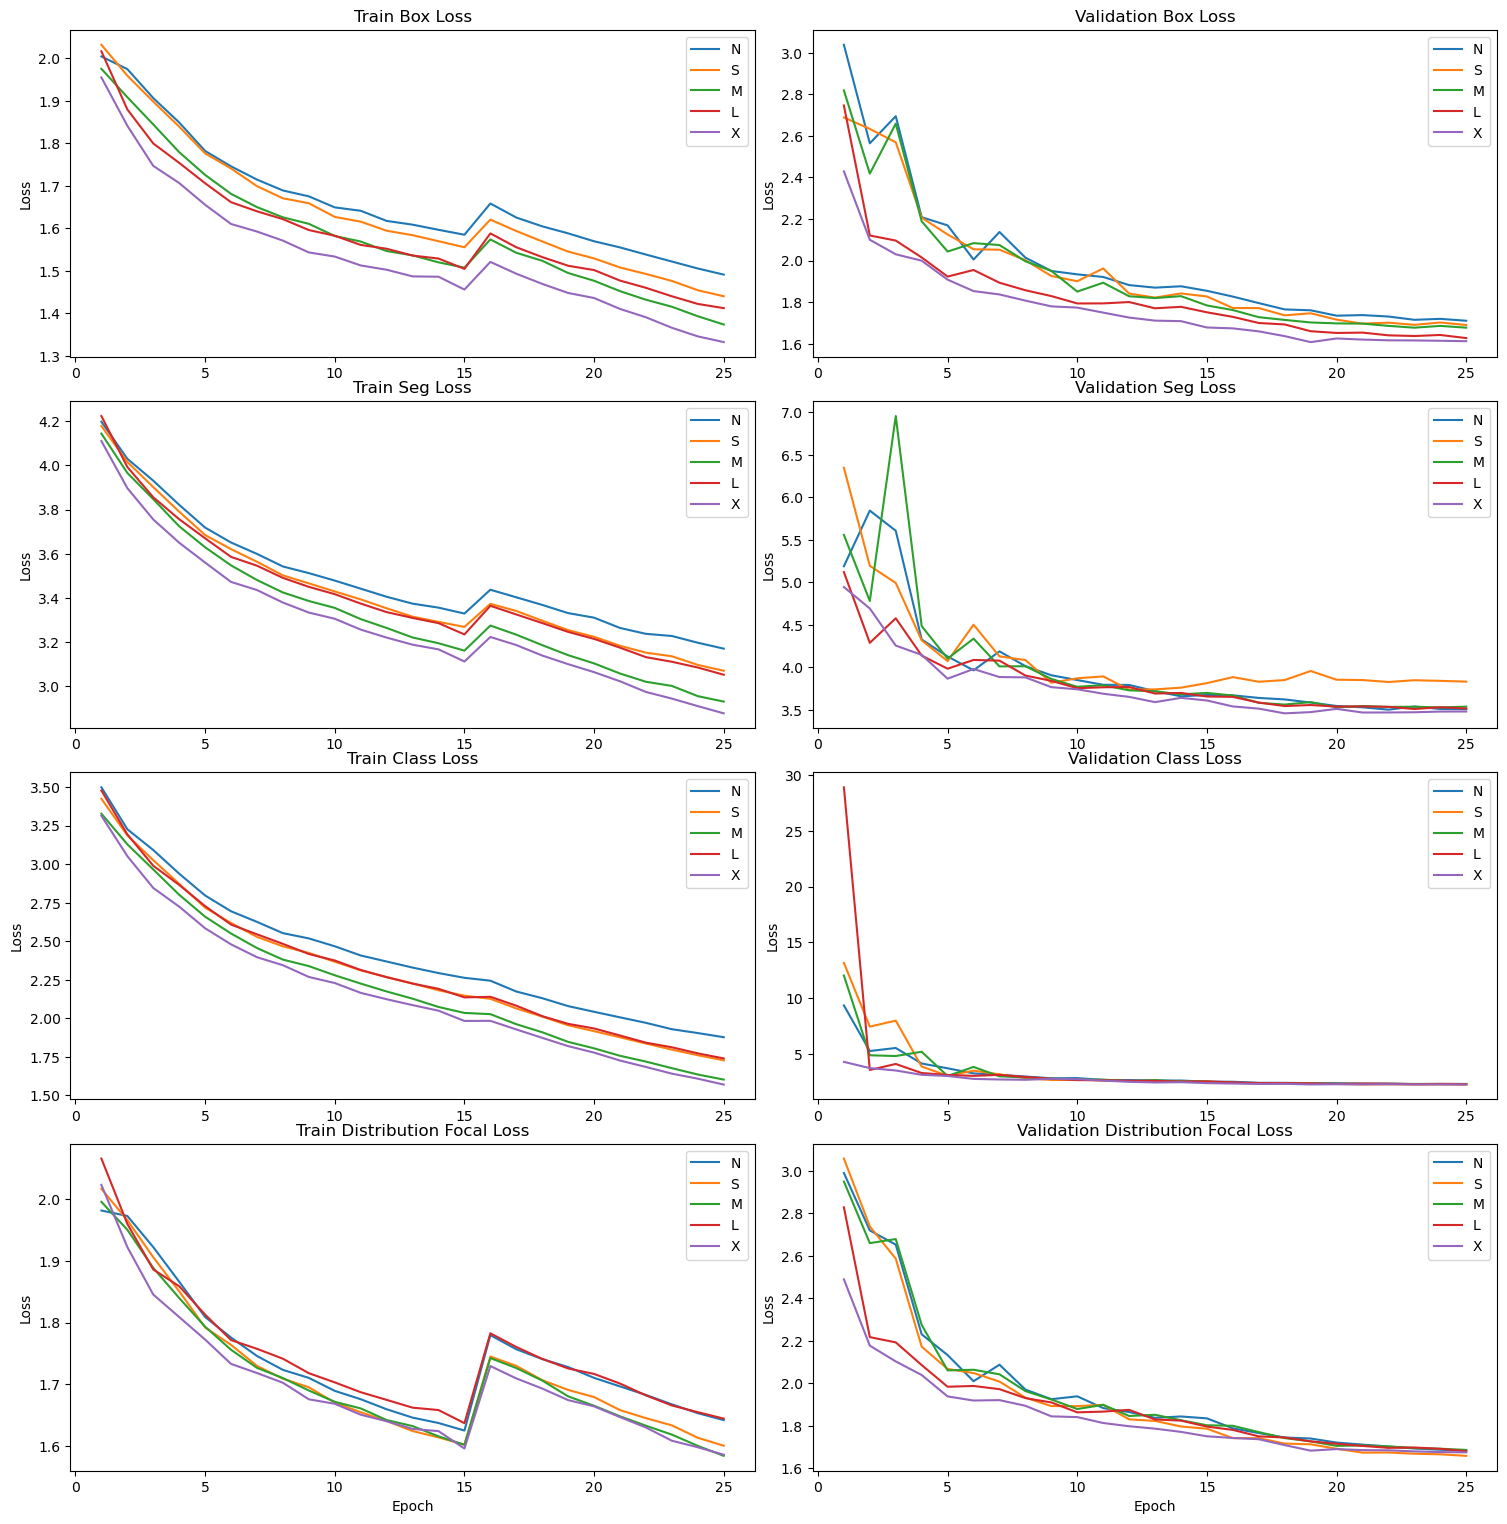

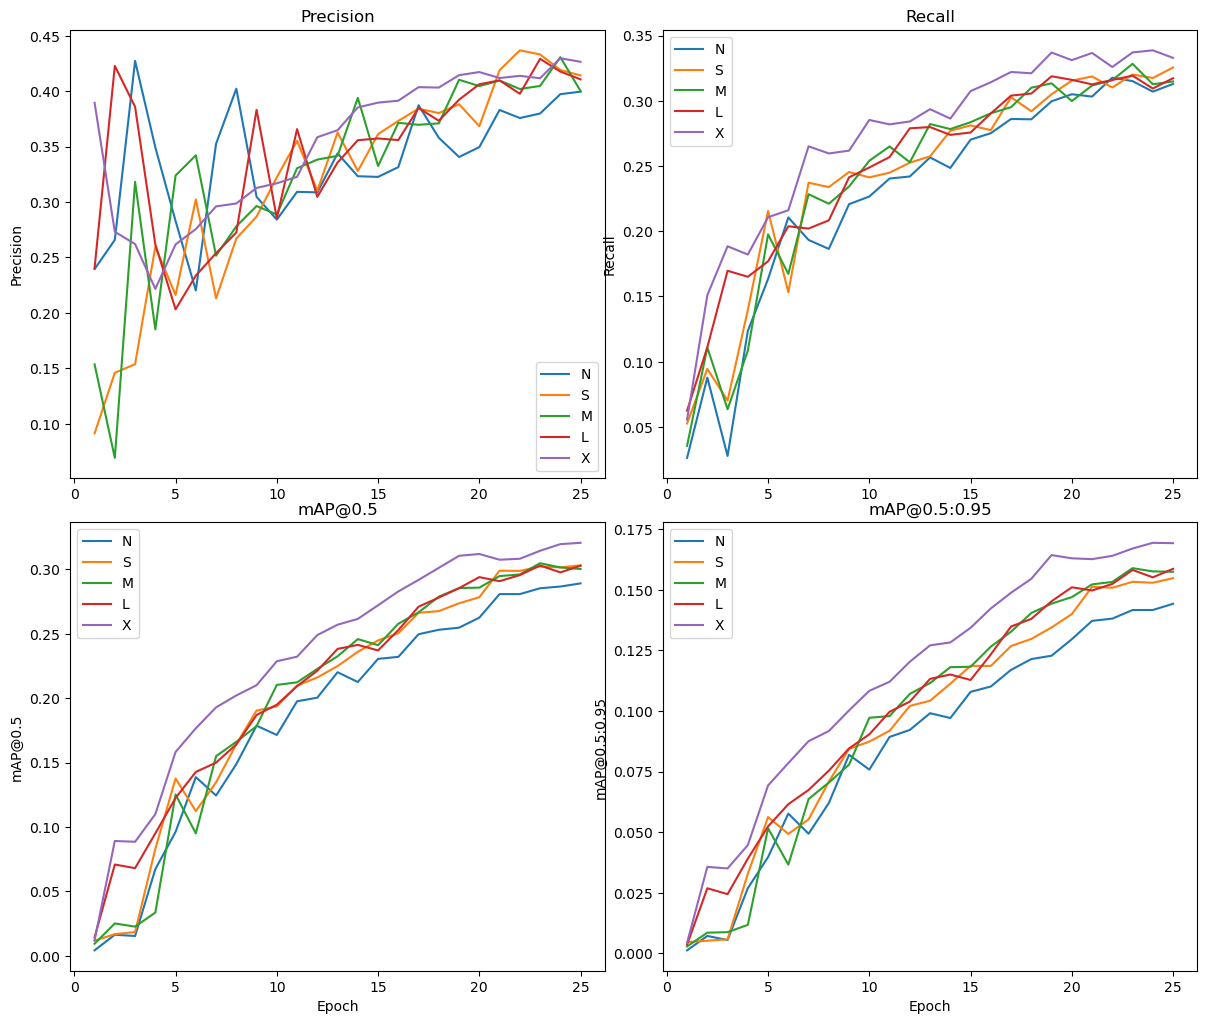


=== N ===


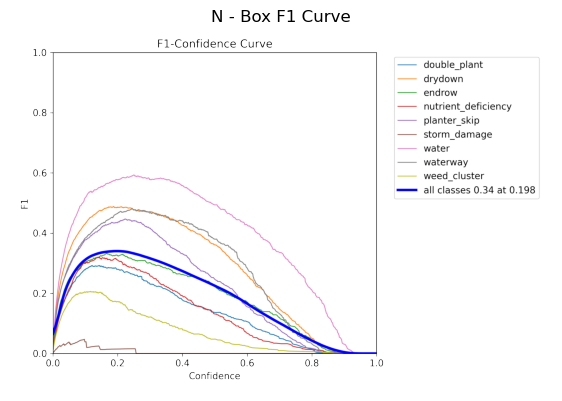

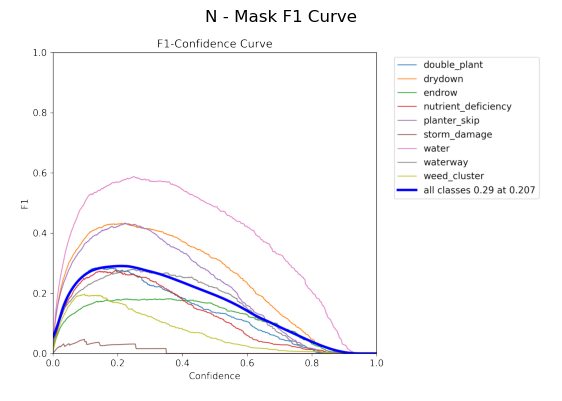

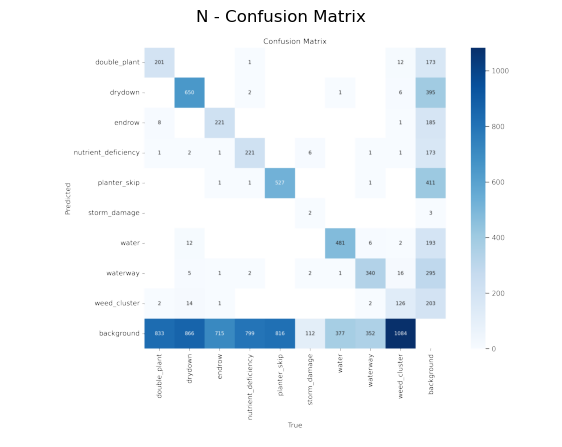


=== S ===


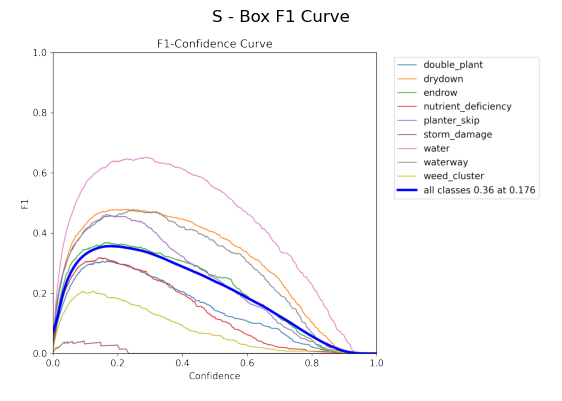

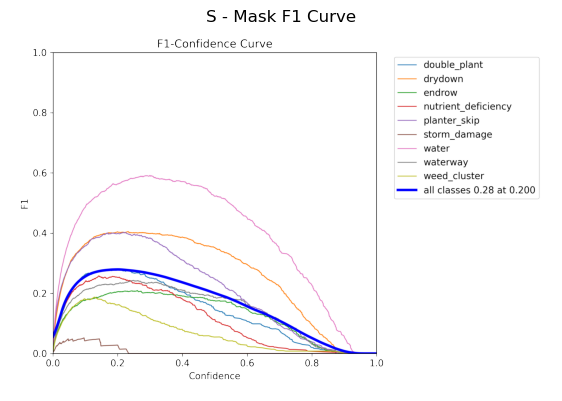

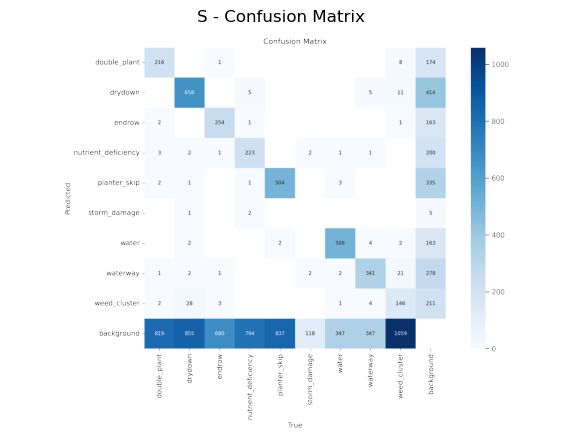


=== M ===

=== L ===


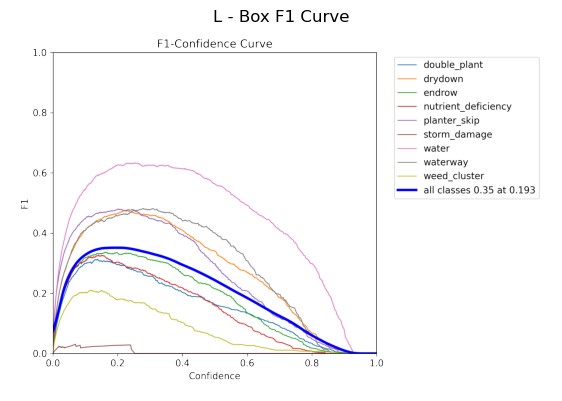

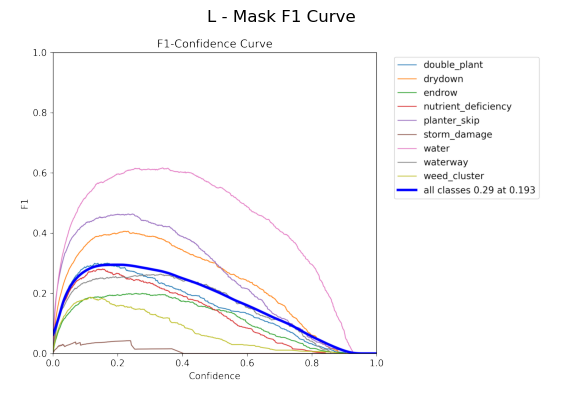

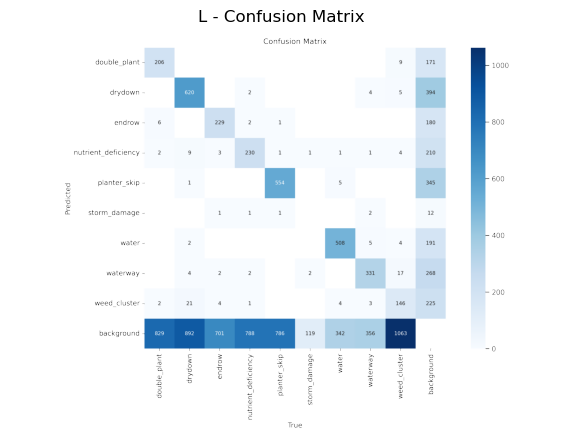


=== X ===


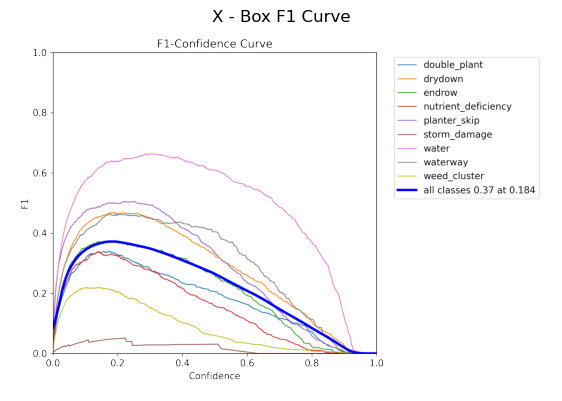

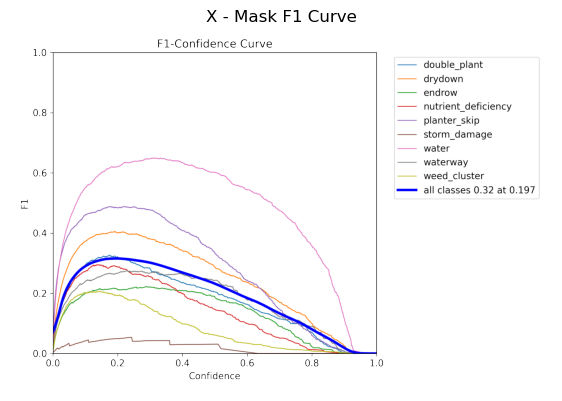

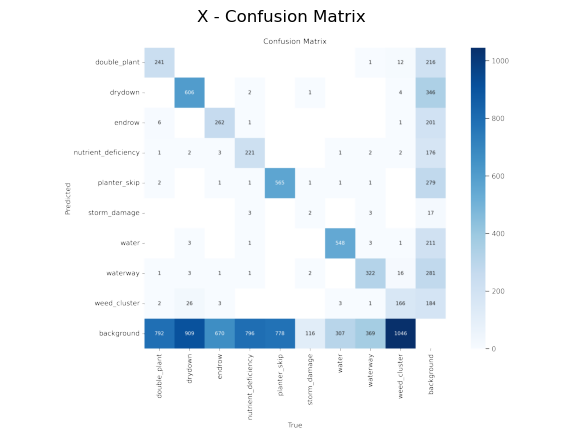

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

csv_paths = [
    "YOLOSEG/YOLOn/results.csv",
    "YOLOSEG/YOLOs/results.csv",
    "YOLOSEG/YOLOm/results.csv",
    "YOLOSEG/YOLOl/results.csv",
    "YOLOSEG/YOLOx/results.csv"
]

dfs = [pd.read_csv(p) for p in csv_paths]

labels = ["N",     "S",    "M", "L", "X"]

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.tight_layout()

# --- Train Box Loss ---
for i, df in enumerate(dfs):
    axes[0, 0].plot(df["epoch"], df["train/box_loss"], label=labels[i])
axes[0, 0].set_title("Train Box Loss")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()

# --- Val Box Loss ---
for i, df in enumerate(dfs):
    axes[0, 1].plot(df["epoch"], df["val/box_loss"], label=labels[i])
axes[0, 1].set_title("Validation Box Loss")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()

# --- Train Seg Loss ---
for i, df in enumerate(dfs):
    axes[1, 0].plot(df["epoch"], df["train/seg_loss"], label=labels[i])
axes[1, 0].set_title("Train Seg Loss")
axes[1, 0].set_ylabel("Loss")
axes[1, 0].legend()

# --- Val Seg Loss ---
for i, df in enumerate(dfs):
    axes[1, 1].plot(df["epoch"], df["val/seg_loss"], label=labels[i])
axes[1, 1].set_title("Validation Seg Loss")
axes[1, 1].set_ylabel("Loss")
axes[1, 1].legend()

# --- Train Class Loss ---
for i, df in enumerate(dfs):
    axes[2, 0].plot(df["epoch"], df["train/cls_loss"], label=labels[i])
axes[2, 0].set_title("Train Class Loss")
axes[2, 0].set_ylabel("Loss")
axes[2, 0].legend()

# --- Val Class Loss ---
for i, df in enumerate(dfs):
    axes[2, 1].plot(df["epoch"], df["val/cls_loss"], label=labels[i])
axes[2, 1].set_title("Validation Class Loss")
axes[2, 1].set_ylabel("Loss")
axes[2, 1].legend()

# --- Train DFL Loss ---
for i, df in enumerate(dfs):
    axes[3, 0].plot(df["epoch"], df["train/dfl_loss"], label=labels[i])
axes[3, 0].set_title("Train Distribution Focal Loss")
axes[3, 0].set_xlabel("Epoch")
axes[3, 0].set_ylabel("Loss")
axes[3, 0].legend()

# --- Val DFL Loss ---
for i, df in enumerate(dfs):
    axes[3, 1].plot(df["epoch"], df["val/dfl_loss"], label=labels[i])
axes[3, 1].set_title("Validation Distribution Focal Loss")
axes[3, 1].set_xlabel("Epoch")
axes[3, 1].set_ylabel("Loss")
axes[3, 1].legend()

plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# Precision
for i, df in enumerate(dfs):
    axes[0, 0].plot(df["epoch"], df["metrics/precision(B)"], label=labels[i])
axes[0, 0].set_title("Precision")
axes[0, 0].set_ylabel("Precision")
axes[0, 0].legend()

# Recall
for i, df in enumerate(dfs):
    axes[0, 1].plot(df["epoch"], df["metrics/recall(B)"], label=labels[i])
axes[0, 1].set_title("Recall")
axes[0, 1].set_ylabel("Recall")
axes[0, 1].legend()

# mAP@0.5
for i, df in enumerate(dfs):
    axes[1, 0].plot(df["epoch"], df["metrics/mAP50(B)"], label=labels[i])
axes[1, 0].set_title("mAP@0.5")
axes[1, 0].set_ylabel("mAP@0.5")
axes[1, 0].set_xlabel("Epoch")
axes[1, 0].legend()

# mAP@0.5:0.95
for i, df in enumerate(dfs):
    axes[1, 1].plot(df["epoch"], df["metrics/mAP50-95(B)"], label=labels[i])
axes[1, 1].set_title("mAP@0.5:0.95")
axes[1, 1].set_ylabel("mAP@0.5:0.95")
axes[1, 1].set_xlabel("Epoch")
axes[1, 1].legend()

plt.show()

model_dirs = [
    "YOLOSEG/YOLOn",
    "YOLOSEG/YOLOs",
    "YOLOSEG/YOLOm",
    "YOLOSEG/YOLOl",
    "YOLOSEG/YOLOx"
]

for i, mdir in enumerate(model_dirs):
    print(f"\n=== {labels[i]} ===")

    path_box_f1 = os.path.join(mdir, "BoxF1_curve.png")
    if os.path.exists(path_box_f1):
        f1_box_curve = Image.open(path_box_f1)
        plt.figure(figsize=(7, 6))
        plt.imshow(f1_box_curve)
        plt.title(f"{labels[i]} - Box F1 Curve")
        plt.axis("off")
        plt.show()

    path_mask_f1 = os.path.join(mdir, "MaskF1_curve.png")
    if os.path.exists(path_mask_f1):
        f1_mask_curve = Image.open(path_mask_f1)
        plt.figure(figsize=(7, 6))
        plt.imshow(f1_mask_curve)
        plt.title(f"{labels[i]} - Mask F1 Curve")
        plt.axis("off")
        plt.show()

    path_conf_mat = os.path.join(mdir, "confusion_matrix.png")
    if os.path.exists(path_conf_mat):
        conf_mat_img = Image.open(path_conf_mat)
        plt.figure(figsize=(7, 6))
        plt.imshow(conf_mat_img)
        plt.title(f"{labels[i]} - Confusion Matrix")
        plt.axis("off")
        plt.show()


In [4]:
import pandas as pd

df = pd.read_csv("./YOLOSEG/YOLOm/results.csv")

df[df.epoch > 14]

,epoch,time,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
14,15,7028.75,1.50695,3.16137,2.03527,1.60146,0.33239,0.28361,0.24117,0.11823,...,0.22757,0.17923,0.07681,1.78393,3.70028,2.51685,1.80319,0.002228,0.002228,0.002228
15,16,7463.57,1.57353,3.27488,2.02740,1.74229,0.37134,0.29046,0.25779,0.12652,...,0.22786,0.18595,0.07892,1.76171,3.66966,2.40133,1.80069,0.002030,0.002030,0.002030
16,17,7987.78,1.54202,3.23366,1.96229,1.72608,0.36959,0.29516,0.26663,0.13270,...,0.24234,0.20077,0.08796,1.72740,3.58386,2.36828,1.77106,0.001832,0.001832,0.001832
17,18,8456.15,1.52326,3.18623,1.91008,1.70580,0.37084,0.31006,0.27881,0.14041,...,0.24790,0.21034,0.09153,1.71430,3.56337,2.33669,1.74278,0.001634,0.001634,0.001634
18,19,8891.89,1.49444,3.14085,1.84751,1.68004,0.41017,0.31340,0.28548,0.14427,...,0.25712,0.21485,0.09226,1.70202,3.59232,2.34254,1.72757,0.001436,0.001436,0.001436
19,20,9377.44,1.47618,3.10366,1.80565,1.66476,0.40449,0.29983,0.28584,0.14696,...,0.25104,0.22032,0.09715,1.69751,3.53024,2.31992,1.70631,0.001238,0.001238,0.001238
20,21,9838.55,1.45173,3.05779,1.75734,1.64763,0.40951,0.31174,0.29483,0.15220,...,0.25850,0.22521,0.09868,1.69642,3.54676,2.31799,1.70838,0.001040,0.001040,0.001040
21,22,10333.30,1.43153,3.02039,1.71970,1.63239,0.40185,0.31589,0.29607,0.15322,...,0.26037,0.22916,0.10085,1.68566,3.53556,2.30958,1.70344,0.000842,0.000842,0.000842
22,23,10775.60,1.41510,3.00171,1.67709,1.61788,0.40462,0.32835,0.30480,0.15890,...,0.26882,0.22971,0.10160,1.67691,3.53804,2.30290,1.69631,0.000644,0.000644,0.000644
23,24,11213.30,1.39267,2.95539,1.63594,1.59962,0.43057,0.31271,0.30152,0.15756,...,0.25895,0.22943,0.10227,1.68548,3.53020,2.29865,1.69298,0.000446,0.000446,0.000446


In [7]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epoch                 25 non-null     int64  
 1   time                  25 non-null     float64
 2   train/box_loss        25 non-null     float64
 3   train/seg_loss        25 non-null     float64
 4   train/cls_loss        25 non-null     float64
 5   train/dfl_loss        25 non-null     float64
 6   metrics/precision(B)  25 non-null     float64
 7   metrics/recall(B)     25 non-null     float64
 8   metrics/mAP50(B)      25 non-null     float64
 9   metrics/mAP50-95(B)   25 non-null     float64
 10  metrics/precision(M)  25 non-null     float64
 11  metrics/recall(M)     25 non-null     float64
 12  metrics/mAP50(M)      25 non-null     float64
 13  metrics/mAP50-95(M)   25 non-null     float64
 14  val/box_loss          25 non-null     float64
 15  val/seg_loss          25 